In [ ]:
import torch
import numpy as np
import torch.nn as nn
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris_df = pd.read_excel('/content/sample_data/Iris.xls')

In [ ]:
iris_df

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa
...,...,...,...,...,...,...
145,3,2.3,5.2,3.0,6.7,Verginica
146,3,1.9,5.0,2.5,6.3,Verginica
147,3,2.0,5.2,3.0,6.5,Verginica
148,3,2.3,5.4,3.4,6.2,Verginica


In [ ]:
pd.DataFrame(iris_df)
y_labele = iris_df.loc[:, 'Species_name']
y_labele

y_label = iris_df['Species_name']
y_label

,Species_name
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Verginica
146,Verginica
147,Verginica
148,Verginica


In [ ]:
iris_df.describe()

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,1.199333,3.758000,3.057333,5.843333
std,0.819232,0.762238,1.765298,0.435866,0.828066
min,1.000000,0.100000,1.000000,2.000000,4.300000
25%,1.000000,0.300000,1.600000,2.800000,5.100000
50%,2.000000,1.300000,4.350000,3.000000,5.800000
75%,3.000000,1.800000,5.100000,3.300000,6.400000
max,3.000000,2.500000,6.900000,4.400000,7.900000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species_No    150 non-null    int64  
 1   Petal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Sepal_width   150 non-null    float64
 4   Sepal_length  150 non-null    float64
 5   Species_name  150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_df.drop('Species_name', axis= 1, inplace = True)

In [ ]:
iris_df

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length
0,1,0.2,1.4,3.5,5.1
1,1,0.2,1.4,3.0,4.9
2,1,0.2,1.3,3.2,4.7
3,1,0.2,1.5,3.1,4.6
4,1,0.2,1.4,3.6,5.0
...,...,...,...,...,...
145,3,2.3,5.2,3.0,6.7
146,3,1.9,5.0,2.5,6.3
147,3,2.0,5.2,3.0,6.5
148,3,2.3,5.4,3.4,6.2


In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

nca_pipe = Pipeline([('nca', nca), ('knn', knn)]) #Pipeline--> when we want to perform series of steps...designed for tasks like data preprocessing, feature extraction, and model training.
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.9619047619047619


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Create a dummy dataset with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.5)

# Convert to a DataFrame for easier handling
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = y

# Display the first few rows of the dataset
print(df)


     Feature 1  Feature 2  Cluster
0    -9.527369   6.048756        3
1   -10.128948   6.746690        3
2    -1.275380   7.183021        0
3    -7.206149  -5.231944        2
4   -11.895515   5.811393        3
..         ...        ...      ...
295  -4.235688   9.577833        0
296   3.396386   1.132898        1
297  -4.920422   9.291237        0
298  -8.810700   9.838179        3
299  -7.533919   9.356980        3

[300 rows x 3 columns]


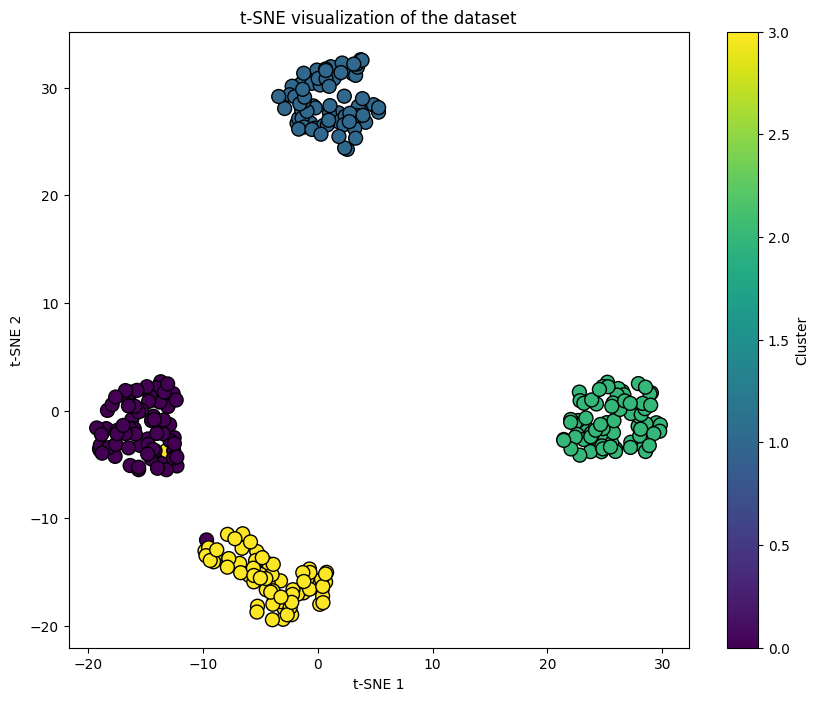

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Create a dummy dataset with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.5)

# Convert to a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Cluster'] = y

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add the t-SNE components to the DataFrame
df['t-SNE 1'] = X_tsne[:, 0]
df['t-SNE 2'] = X_tsne[:, 1]

# Plot the t-SNE result
plt.figure(figsize=(10, 8))
plt.scatter(df['t-SNE 1'], df['t-SNE 2'], c=df['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.colorbar(label='Cluster')
plt.title('t-SNE visualization of the dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


In [ ]:
import pandas as pd

titanic = pd.read_csv('/content/sample_data/train_and_test2.csv')

In [ ]:
titanic

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [ ]:
titanic.shape

(1309, 28)

In [ ]:
titanic.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [ ]:
titanic.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [ ]:
titanic.isnull()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
